In [1]:
from  MPband import MPband
import numpy as np

In [2]:
def get_rf(d,p):
    tmp=[]
    for i,a in enumerate(p):
        idx=np.where(a!=0)[0]
        a=a&0
        if len(idx)>0:
            a[:idx[0]]=1
        tmp.append((d[i]*a).sum())
    return tmp

In [3]:
phase = np.loadtxt("../phase")
cir=phase[0].sum()
phase=phase/cir
vol = np.loadtxt("../volume")
qv = np.loadtxt("../path_vol") 
phase_get = np.load("../phase_get.npy")
d = np.loadtxt("../distance")
# dr = np.loadtxt("dr")
# dr=dr/cir
straight_get = np.load("../straight_get.npy")

srl_get=np.load("../srl_get.npy")
ison = np.array([0, 0, 0, 1, 1, 1])
px = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
pxb = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
qb=[120,120]
lower, upper = 8, 12
linspace = np.arange(lower, upper, 1)
lin_num = len(linspace)

# 南北直行方向绿灯时间
sg=np.array([(straight_get[i]*phase).sum(axis=1) for i in range(len(straight_get))])
srf=np.array([get_rf(phase,straight_get[i]) for i in range(len(srl_get))])
rho = vol[0] / vol[1]
num = len(vol[0])
numr = len(qv)
nump = len(phase_get)
M = 1e6
nx = 0.00000001
be = 8
speedScope = np.array([lower, upper])
speedVar = np.array([-2, 2])

g=np.array([(phase_get[i]*phase).sum(axis=1) for i in range(numr) ])
r=1-g
rf=np.array([get_rf(phase,phase_get[i]) for i in range(numr)])

ex=[0,1,1,0,1,0,1,1,0,1,1,0,1,1]
dwt=15
p=[0,0,0,0,1,0,0,1,0,0,1,0,0,1,0]


In [4]:
mpb=MPband(phase, [80,180], vol, qv, phase_get, d, straight_get, ison, px, pxb, qb, lower, upper, 
            be, speedVar[0], speedVar[1],ex, dwt,lower,upper,speedVar[0], speedVar[1],p)
mpb._solve()


Version identifier: 12.10.0.0 | 2019-11-26 | 843d4de2ae
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              201903125
Tried aggregator 2 times.
MIP Presolve eliminated 859 rows and 284 columns.
MIP Presolve modified 695 coefficients.
Aggregator did 55 substitutions.
Reduced MIP has 624 rows, 345 columns, and 2004 nonzeros.
Reduced MIP has 25 binaries, 63 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (2.33 ticks)
Probing fixed 0 vars, tightened 48 bounds.
Probing time = 0.00 sec. (0.13 ticks)
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve eliminated 0 rows and 2 columns.
MIP Presolve modified 144 coefficients.
Reduced MIP has 624 rows, 343 columns, and 2000 nonzeros.
Reduced MIP has 23 binaries, 63 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (1.12 ticks)
Probing time = 0.00 sec. (0.10 ticks)
Clique table members: 9.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic

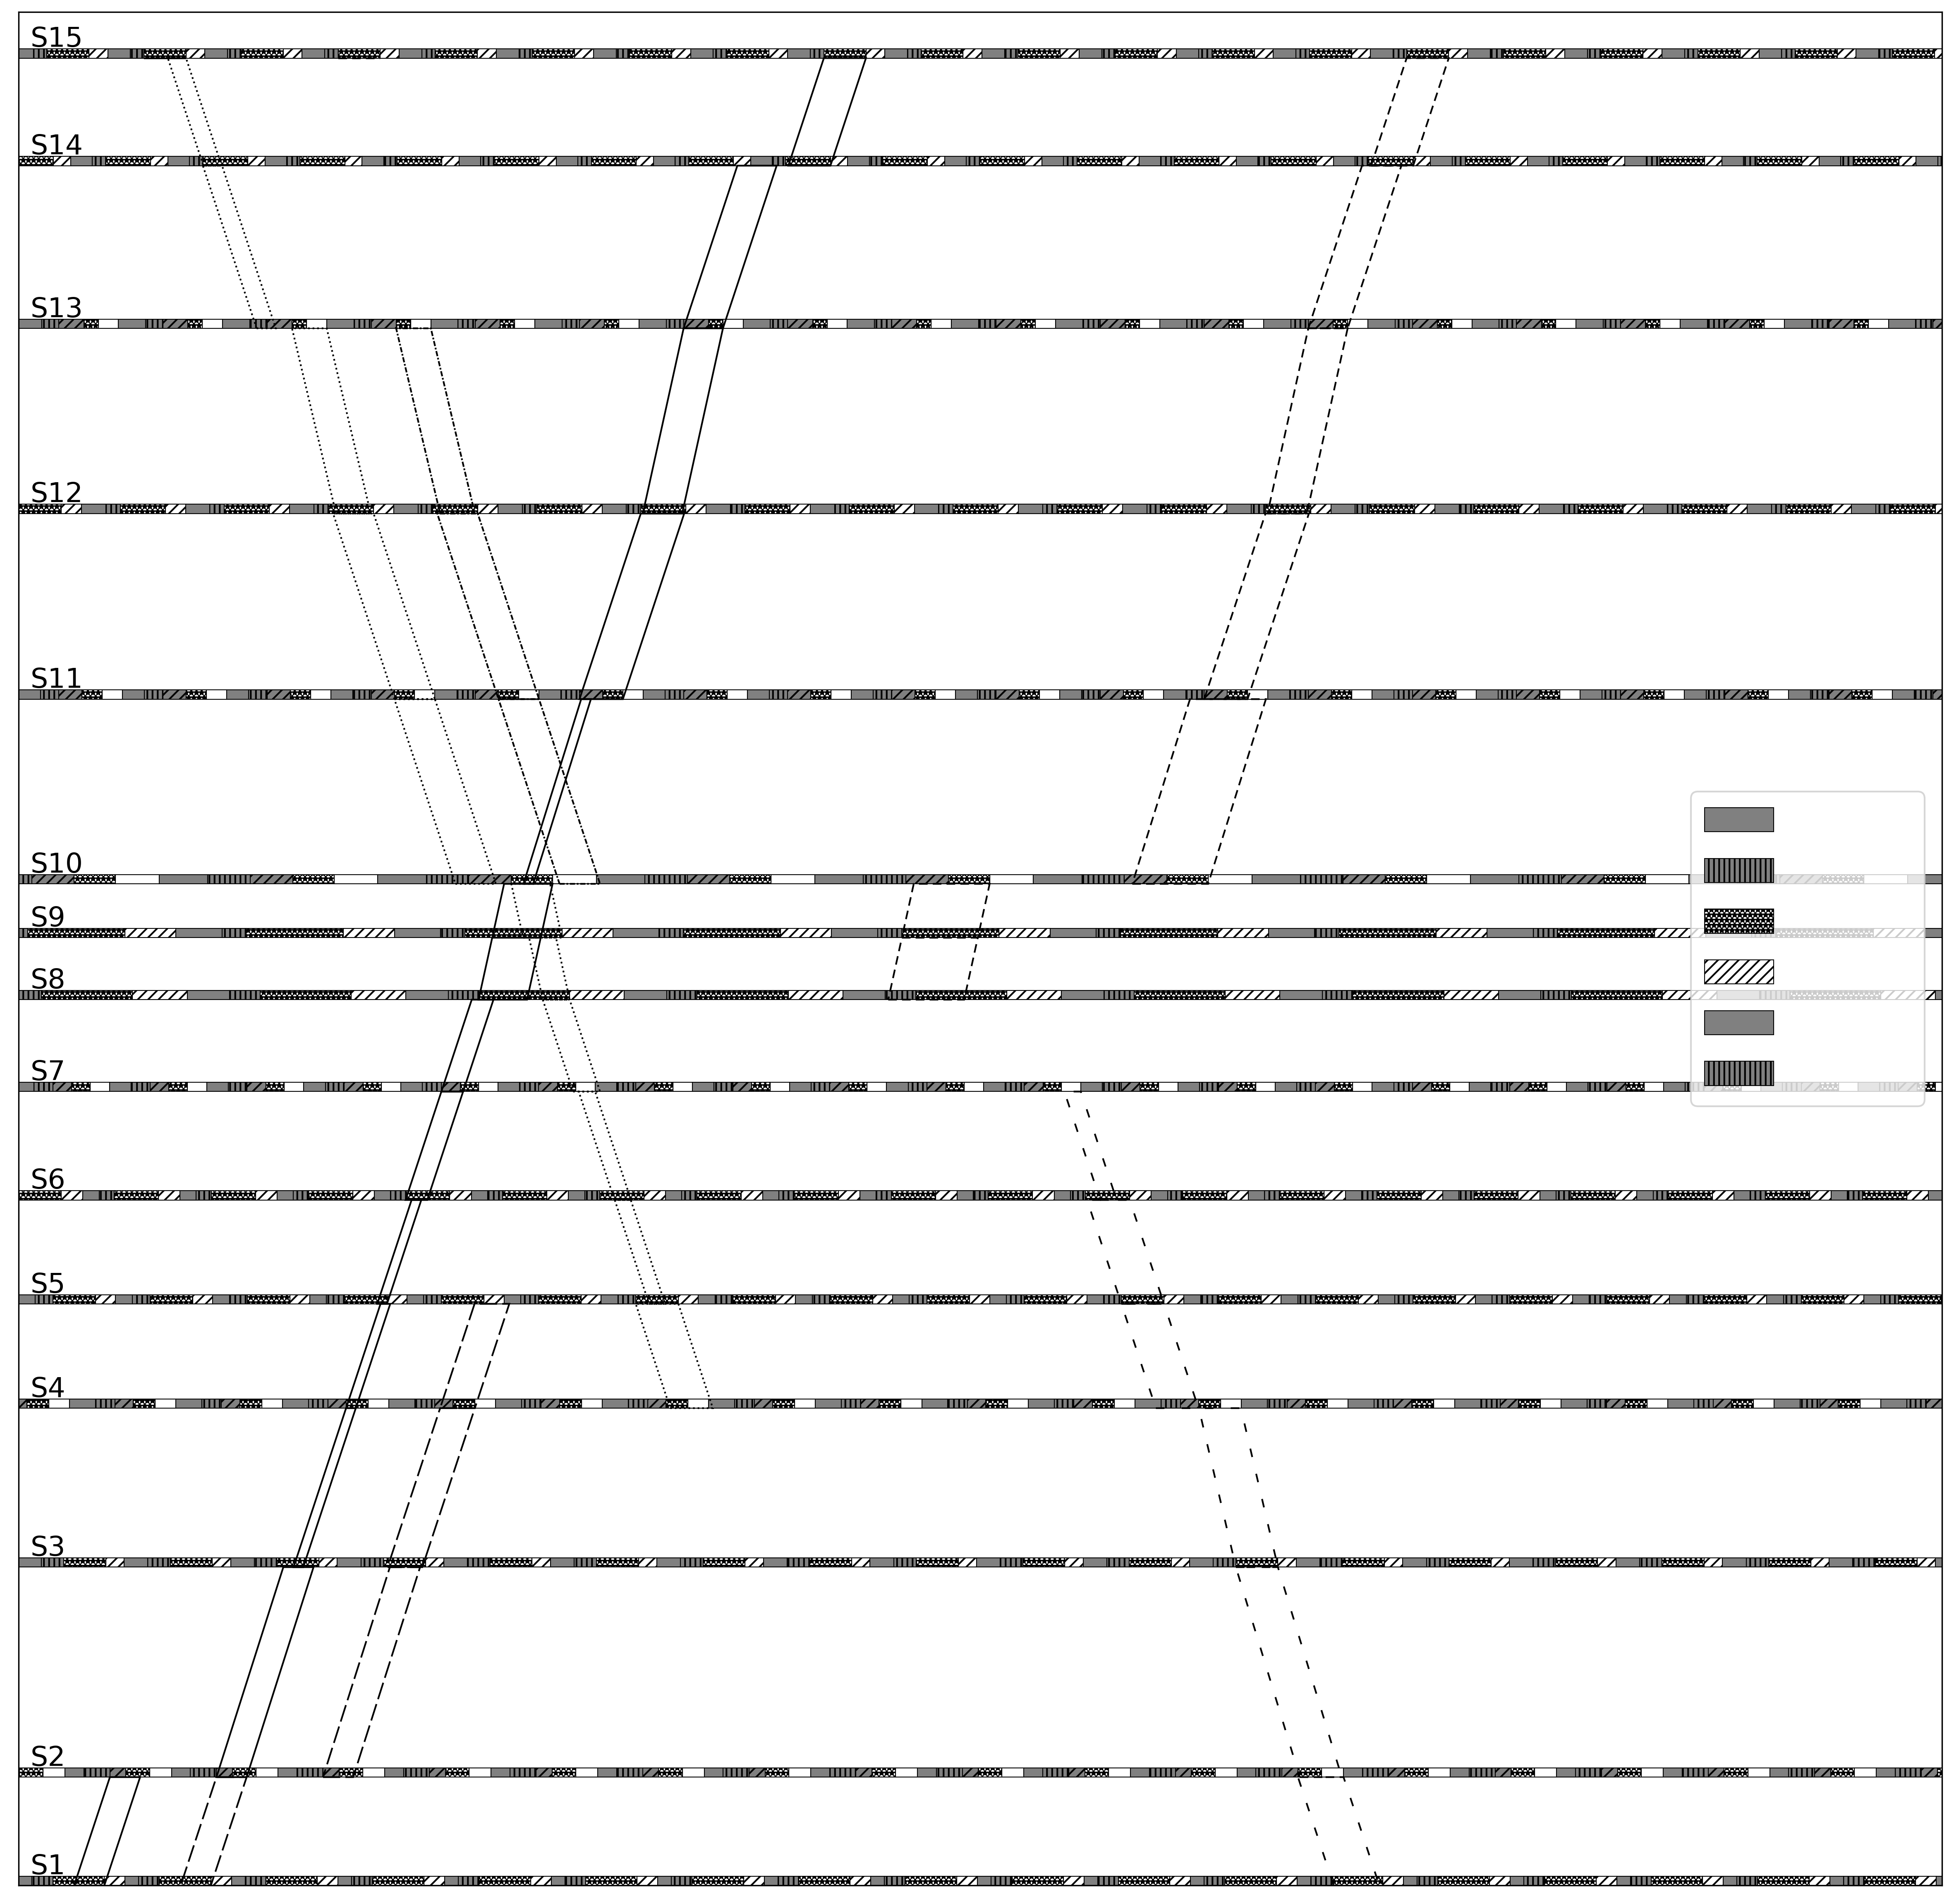

In [5]:
colors=[
            {"color":"gray" , "hatch": None, "fill": True},
            {"color":"gray", "hatch":"||||" , "fill": True},
            {"color": "gray", "hatch":"////" , "fill": True},
            {"color":"white", "hatch": "****", "fill": False},
            {"color": "white", "hatch": None, "fill": False},
            {"color": "white", "hatch": "////", "fill": False},
            {"color": "white", "hatch": "||||", "fill": False},
            {"color": "white", "hatch": "\\\\\\\\", "fill": False},
            {"color": "white", "hatch": "xxxx", "fill": False},
            {"color": "white", "hatch": "....", "fill": False},
        ]
linestyles=[
    {"linestyle":"-" },
    {"linestyle":(5,(10,3))},
    {"linestyle":(0, (5, 3)) },
    {"linestyle":":" },
    {"linestyle":(0, (3, 1, 1, 1)) },
    {"linestyle": (0, (5, 10)) },
]
legends=["1->15", "1->6", "8->15", "15->2", "14->9", "7->1"]
mpb.draw_car_bound("./时距图",colors,legends,2,linestyles)